<h1><center>Case Study 4:</center></h1>
<h2><center>XGBoost to Classify Bankruptcy</center></h2>
<h3>Authors:</h3>
Joaquin Dominguez <br>
Richard Kim <br>

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


### EDA

In [2]:
from pathlib import Path
#directory = '/home/joaquindominguez/Documents/QTW/case_studies/QTW_CaseStudy/Case Study 4/data'
directory = 'D:/Shared Lenovo/Data Science/Semester 4/Quantifying the World/Case Study 4/data'
files = Path(directory).glob('*')

In [3]:
raw=pd.DataFrame()
n=1
for i in files:
    data = arff.loadarff(i)
    df = pd.DataFrame(data[0])
    df['year'] = n
    raw = pd.concat([raw,df])
    n+=1

In [4]:
raw.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',1


In [5]:
raw['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [6]:
eda = raw.copy()
eda['class'] = eda['class'].astype('str')
eda['class'].replace(regex=True, inplace=True, to_replace=r"'",value=r'')
eda['class'] = eda['class'].replace({"b0":0, "b1":1})
eda['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

Duplicates

In [7]:
eda.duplicated().sum()

401

In [8]:
eda.drop_duplicates(inplace=True)
eda.duplicated().sum()

0

Missing Values

In [9]:
eda['class'].isna().sum()

0

In [10]:
for i in eda.columns:
    mv = eda[i].isna().sum()
    if mv > 5:
        print(i, mv)

Attr1 8
Attr2 8
Attr3 8
Attr4 133
Attr5 89
Attr6 8
Attr7 8
Attr8 93
Attr9 9
Attr10 8
Attr11 44
Attr12 133
Attr13 125
Attr14 8
Attr15 36
Attr16 94
Attr17 93
Attr18 8
Attr19 126
Attr20 125
Attr21 5836
Attr22 8
Attr23 125
Attr24 922
Attr25 8
Attr26 94
Attr27 2750
Attr28 804
Attr29 8
Attr30 125
Attr31 125
Attr32 366
Attr33 133
Attr34 93
Attr35 8
Attr36 8
Attr37 18836
Attr38 8
Attr39 125
Attr40 133
Attr41 754
Attr42 125
Attr43 125
Attr44 125
Attr45 2133
Attr46 134
Attr47 296
Attr48 9
Attr49 125
Attr50 93
Attr51 8
Attr52 300
Attr53 804
Attr54 804
Attr56 125
Attr57 7
Attr58 82
Attr59 7
Attr60 2138
Attr61 101
Attr62 125
Attr63 133
Attr64 804


In [11]:
imp = SimpleImputer(strategy = 'mean', missing_values=np.nan)
imp = imp.fit(eda)
eda_2 = pd.DataFrame(imp.transform(eda.loc[:,:]), columns =eda.columns)
eda_2['class'] = eda_2['class'].astype('int')

In [12]:
eda_2.isna().sum().sum()

0

Distributions

array([[<AxesSubplot:title={'center':'Attr1'}>,
        <AxesSubplot:title={'center':'Attr2'}>,
        <AxesSubplot:title={'center':'Attr3'}>,
        <AxesSubplot:title={'center':'Attr4'}>,
        <AxesSubplot:title={'center':'Attr5'}>,
        <AxesSubplot:title={'center':'Attr6'}>,
        <AxesSubplot:title={'center':'Attr7'}>,
        <AxesSubplot:title={'center':'Attr8'}>],
       [<AxesSubplot:title={'center':'Attr9'}>,
        <AxesSubplot:title={'center':'Attr10'}>,
        <AxesSubplot:title={'center':'Attr11'}>,
        <AxesSubplot:title={'center':'Attr12'}>,
        <AxesSubplot:title={'center':'Attr13'}>,
        <AxesSubplot:title={'center':'Attr14'}>,
        <AxesSubplot:title={'center':'Attr15'}>,
        <AxesSubplot:title={'center':'Attr16'}>],
       [<AxesSubplot:title={'center':'Attr17'}>,
        <AxesSubplot:title={'center':'Attr18'}>,
        <AxesSubplot:title={'center':'Attr19'}>,
        <AxesSubplot:title={'center':'Attr20'}>,
        <AxesSubplot:title=

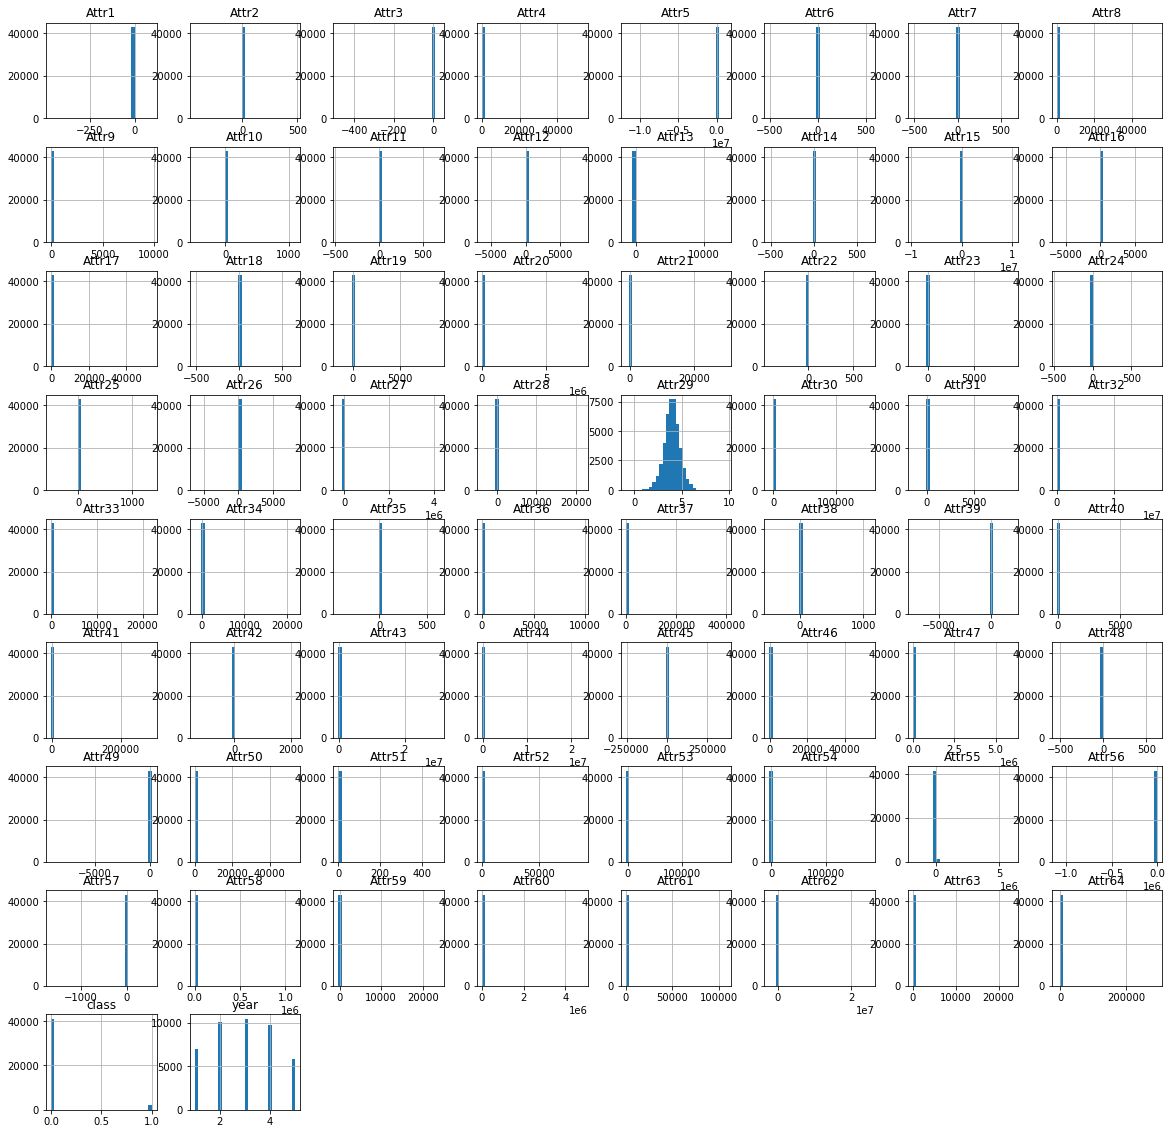

In [13]:
eda_2.hist(bins=30, figsize=(20, 20))

In [14]:
eda_2.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
count,43004.000000,43004.000000,43004.000000,43004.000000,4.300400e+04,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,...,43004.000000,4.300400e+04,43004.000000,4.300400e+04,43004.000000,4.300400e+04,43004.000000,43004.000000,43004.000000,43004.000000
mean,0.040780,0.591872,0.113666,6.344235,-3.861957e+02,-0.057602,0.097948,12.030065,2.574874,0.604874,...,-0.010005,3.029692e+01,1.337995,4.521705e+02,17.114198,1.509433e+03,9.367905,72.651619,0.048437,2.940401
std,2.740643,5.869296,5.464154,296.349513,6.146198e+04,7.234103,5.665732,487.183722,60.396199,13.970689,...,13.734197,5.354078e+03,122.660845,3.168020e+04,554.964928,1.397060e+05,124.558655,2355.605626,0.214691,1.283303
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,1.000000
25%,0.003395,0.269917,0.021582,1.050700,-4.952500e+01,0.000000,0.005758,0.429638,1.018900,0.294580,...,0.014694,8.758000e-01,0.000000,5.732300e+00,4.520750,4.216375e+01,3.103100,2.217075,0.000000,2.000000
50%,0.049637,0.472440,0.196770,1.573900,-1.093650e+00,0.000000,0.059642,1.070950,1.198800,0.505345,...,0.120020,9.512600e-01,0.006164,1.041100e+01,6.659800,7.149150e+01,5.107200,4.413950,0.000000,3.000000
75%,0.129713,0.689040,0.403587,2.803000,5.056100e+01,0.087655,0.151062,2.621425,2.070600,0.708102,...,0.285425,9.928400e-01,0.236650,2.400925e+01,10.471000,1.176500e+02,8.659000,10.533250,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


<AxesSubplot:>

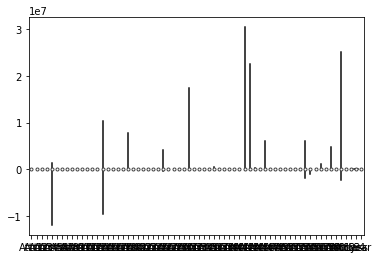

In [15]:
sns.violinplot(data=eda_2)

Train/Test Split

In [16]:

y = eda_2['class']
X = eda_2.drop(columns=['class'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [17]:
y_train.value_counts()

0    32760
1     1643
Name: class, dtype: int64

### Random Forest Classifier

In [18]:
# Benchmark
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 10, random_state =9)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(preds, y_test))

0.961632368329264
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8483
           1       0.26      0.97      0.41       118

    accuracy                           0.96      8601
   macro avg       0.63      0.96      0.69      8601
weighted avg       0.99      0.96      0.97      8601



In [19]:
print(X.shape)
print(y.shape)
print(raw.shape)

(43004, 65)
(43004,)
(43405, 66)


### XGBoost

In [20]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
ddata = xgb.DMatrix(X, label=y)

In [21]:
from itertools import product
import random

# Create lists of hyperparameters to test
etas = [.1]
subsamples = [.8, .85]
min_child_weights = [1, 3, 5]
max_depths = [1, 3, 5]

# Combine lists into df with every combination of hyperparameters
hypers = pd.DataFrame(
    list(product(etas,subsamples,min_child_weights)), 
    columns=['eta','subsample','min_child_weight'])

# Create randomized list of index values (used for randomized search selection)
# uses set seed
rand_index = [*range(0, len(hypers))]
random.seed(10)
random.shuffle(rand_index)

# rand_hypers has a random list of 5 combinations to test
hypers['index'] = rand_index
rand_hypers = hypers[hypers['index'] < 10]

rand_hypers = rand_hypers.drop(['index'], axis=1)

In [22]:
def xgb_select(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'logloss',
              'eta':x['eta'],
              'subsample':x['subsample'],
              #'max_depth':x['max_depth'],
              'min_child_weight':x['min_child_weight'],
              'scale_pos_weight':19.926}
    xgb_cv = xgb.cv(params = params, dtrain = dtrain, num_boost_round=500, nfold=5, early_stopping_rounds=2, seed=10)
    return xgb_cv[-1:].values[0]

In [23]:
rand_hypers[['train-logloss-mean','train-logloss-std','test-logloss-mean','test-logloss-std']] = rand_hypers.apply(xgb_select,axis=1,result_type='expand')
rand_hypers.sort_values('train-logloss-mean')

,eta,subsample,min_child_weight,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
4,0.1,0.85,3,0.011142,0.000207,0.062233,0.002268
5,0.1,0.85,5,0.011677,0.000338,0.062043,0.002347
3,0.1,0.85,1,0.011750,0.000238,0.063563,0.002279
0,0.1,0.80,1,0.011761,0.000566,0.063371,0.001945
1,0.1,0.80,3,0.013411,0.000468,0.063739,0.002198
2,0.1,0.80,5,0.014490,0.000183,0.063278,0.001827


In [24]:
# Double-checking best hyperparameters
params = {
    'objective':'binary:logistic',
    'eval_metric':'logloss', 
    'eta':.1, 
    'subsample':.85, 
    'min_child_weight':3,
    'scale_pos_weight':19.926}

xgb_cv = xgb.cv(params = params, dtrain = dtrain, num_boost_round=1000, nfold=5, early_stopping_rounds=2, seed=10, as_pandas=True)
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.641211,0.000946,0.642241,0.000732
1,0.596292,0.001815,0.598289,0.001815
2,0.558519,0.002307,0.561159,0.002113
3,0.525726,0.002889,0.529211,0.002793
4,0.496455,0.003000,0.500651,0.002944
...,...,...,...,...
316,0.011485,0.000232,0.062384,0.002191
317,0.011403,0.000219,0.062346,0.002242
318,0.011291,0.000248,0.062311,0.002270
319,0.011238,0.000222,0.062303,0.002238


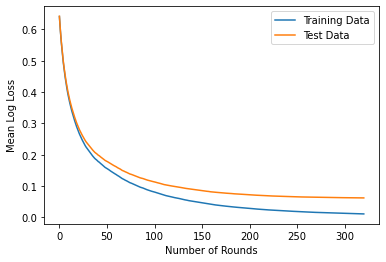

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xgb_cv['train-logloss-mean'], label='Training Data')
plt.plot(xgb_cv['test-logloss-mean'], label='Test Data')
plt.legend()
plt.xlabel('Number of Rounds')
plt.ylabel('Mean Log Loss')
plt.show()

In [26]:
evallist = [(dtest,'eval'), (dtrain,'train')]
params = {
    'objective':'binary:logistic',
    'eval_metric':'logloss', 
    'eta':.1, 
    'subsample':.85, 
    'min_child_weight':3,
    'scale_pos_weight':19.926}

xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=1000, evals=evallist, early_stopping_rounds=2)

[0]	eval-logloss:0.64175	train-logloss:0.64121
[1]	eval-logloss:0.59759	train-logloss:0.59621
[2]	eval-logloss:0.56217	train-logloss:0.56007
[3]	eval-logloss:0.52965	train-logloss:0.52646
[4]	eval-logloss:0.50259	train-logloss:0.49885
[5]	eval-logloss:0.47792	train-logloss:0.47336
[6]	eval-logloss:0.45606	train-logloss:0.45138
[7]	eval-logloss:0.43628	train-logloss:0.43112
[8]	eval-logloss:0.41956	train-logloss:0.41360
[9]	eval-logloss:0.40362	train-logloss:0.39705
[10]	eval-logloss:0.38900	train-logloss:0.38204
[11]	eval-logloss:0.37690	train-logloss:0.36918
[12]	eval-logloss:0.36308	train-logloss:0.35484
[13]	eval-logloss:0.35379	train-logloss:0.34502
[14]	eval-logloss:0.34361	train-logloss:0.33452
[15]	eval-logloss:0.33436	train-logloss:0.32429
[16]	eval-logloss:0.32461	train-logloss:0.31386
[17]	eval-logloss:0.31620	train-logloss:0.30504
[18]	eval-logloss:0.30688	train-logloss:0.29517
[19]	eval-logloss:0.29959	train-logloss:0.28740
[20]	eval-logloss:0.29250	train-logloss:0.27965
[2

In [27]:
y_preds = xgb_model.predict(dtest).round()
y_preds

print(accuracy_score(y_preds, y_test))
print(classification_report(y_test, y_preds))

0.9812812463667016
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8161
           1       0.89      0.73      0.80       440

    accuracy                           0.98      8601
   macro avg       0.94      0.86      0.89      8601
weighted avg       0.98      0.98      0.98      8601

